# Intro

The Ames Housing dataset contains of a list of 2919 houses with 80 variables that can be used as input to predict the price of each house. 
Machine Learning will be used to predict the price. Accuracy of the model is checked afterwards.

Source: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

### Understanding the column headers

In [1]:
# Open the file in read mode
file = open('data_description.txt', 'r')

# Read the whole file as a string
text = file.read()

# Print the text
print(text)

# Close the file
file.close()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

### Load the libraries

In [1]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
import lightgbm
import statsmodels.api as sm

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Load the train data

In [3]:
# Load data from the csv file

df_train = pd.read_csv('data/train_orig.csv', keep_default_na=False)
df_train.columns = df_train.columns.str.lower()

dict={'1stflrsf':'firstflrsf','2ndflrsf':'secondflrsf','3ssnporch':'threeseasonporch'}
df_train.rename(columns=dict,inplace=True)

pd.set_option('display.max_columns', 81)
df_train.head(5)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,threeseasonporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


### Some basic data checks

In [5]:
df_train.shape

(1460, 81)

In [ ]:
df_train.describe()

In [6]:
df_train.isna().sum()

id               0
mssubclass       0
mszoning         0
lotfrontage      0
lotarea          0
                ..
mosold           0
yrsold           0
saletype         0
salecondition    0
saleprice        0
Length: 81, dtype: int64

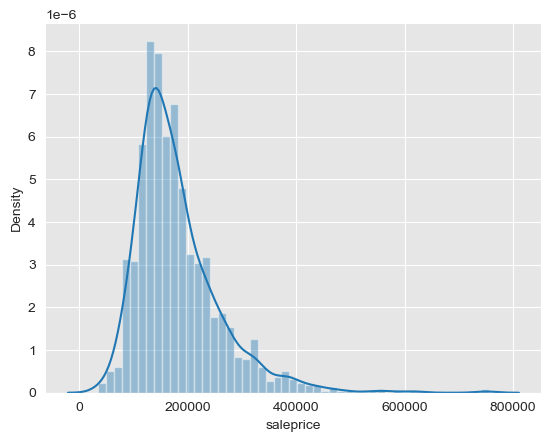

In [4]:
sns.distplot(df_train['saleprice'])
plt.show()

### Load the test data

In [4]:
# Load data from the csv file

df_test = pd.read_csv('data/test_orig.csv', keep_default_na=False)
df_test.columns = df_test.columns.str.lower()

dict={'1stflrsf':'firstflrsf','2ndflrsf':'secondflrsf','3ssnporch':'threeseasonporch'}
df_test.rename(columns=dict,inplace=True)

pd.set_option('display.max_columns', 81)
df_test.head(5)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,threeseasonporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition
0,1461,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,CBlock,TA,TA,No,Rec,468,LwQ,144,270,882,GasA,TA,Y,SBrkr,896,0,0,896,0,0,1,0,2,1,TA,5,Typ,0,NA,Attchd,1961,Unf,1,730,TA,TA,Y,140,0,0,0,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
1,1462,20,RL,81,14267,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108,TA,TA,CBlock,TA,TA,No,ALQ,923,Unf,0,406,1329,GasA,TA,Y,SBrkr,1329,0,0,1329,0,0,1,1,3,1,Gd,6,Typ,0,NA,Attchd,1958,Unf,1,312,TA,TA,Y,393,36,0,0,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74,13830,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,GLQ,791,Unf,0,137,928,GasA,Gd,Y,SBrkr,928,701,0,1629,0,0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997,Fin,2,482,TA,TA,Y,212,34,0,0,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
3,1464,60,RL,78,9978,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20,TA,TA,PConc,TA,TA,No,GLQ,602,Unf,0,324,926,GasA,Ex,Y,SBrkr,926,678,0,1604,0,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998,Fin,2,470,TA,TA,Y,360,36,0,0,0,0,NA,NA,NA,0,6,2010,WD,Normal
4,1465,120,RL,43,5005,Pave,NA,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0,Gd,TA,PConc,Gd,TA,No,ALQ,263,Unf,0,1017,1280,GasA,Ex,Y,SBrkr,1280,0,0,1280,0,0,2,0,2,1,Gd,5,Typ,0,NA,Attchd,1992,RFn,2,506,TA,TA,Y,0,82,0,0,144,0,NA,NA,NA,0,1,2010,WD,Normal


In [7]:
# pd.set_option('display.max_rows', 100)
# df_train.isna().sum()
df_train.dtypes

id                int64
mssubclass        int64
mszoning         object
lotfrontage      object
lotarea           int64
                  ...  
mosold            int64
yrsold            int64
saletype         object
salecondition    object
saleprice         int64
Length: 81, dtype: object

### Preprocessing of the data

1a - Impute missing values in lotfrontage using Machine Learning

In [5]:
# In order to make a prediction model for train and test we need to combine the train and test file to get all available data

df_train_no_target = df_train.drop(columns='saleprice')

# Concatenate two dataframes along rows
df_concat = pd.concat([df_train_no_target, df_test])

# check the shape of the file
df_concat.shape

(2919, 80)

In [6]:
# the model will only be trained with numeric values in the lotfrontage column
df_concat = df_concat.query("lotfrontage != 'NA'")

print(df_concat.shape)

(2433, 80)


1b - Create a Random Forest Model to predict lotfrontage

In [7]:
# Import the RandomForestRegressor class
from sklearn.ensemble import RandomForestRegressor

# Create an instance of the RandomForestRegressor class
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model on your data
model.fit(X=df_concat['lotarea'].values.reshape(-1, 1), y=df_concat['lotfrontage'])

# Make manual predictions for new data
prediction = model.predict(X=np.array([[1953], [3182], [8000]]))

# Display these predictions
print("Prediction:", prediction)

Prediction: [21.82921653 41.36155631 75.11874279]


1c - Having the model, split df_train and df_test in parts with and without a numeric lotfrontage

In [8]:
df_train_with = df_train.query("lotfrontage != 'NA'")
df_train_without = df_train.query("lotfrontage == 'NA'")
df_test_with = df_test.query("lotfrontage != 'NA'")
df_test_without = df_test.query("lotfrontage == 'NA'")

print(df_train_with.shape,df_train_without.shape,df_test_with.shape,df_test_without.shape)

(1201, 81) (259, 81) (1232, 80) (227, 80)


1d - Replace NA values with zeroes

In [9]:
# In df_train_without and df_test_without change NA to 0
# Then for all 4 files set the datatype to int64
df_train_without['lotfrontage'] = df_train_without['lotfrontage'].replace('NA', 0)
df_train_without['lotfrontage'] = df_train_without['lotfrontage'].astype('int64')

df_test_without['lotfrontage'] = df_test_without['lotfrontage'].replace('NA', 0)
df_test_without['lotfrontage'] = df_test_without['lotfrontage'].astype('int64')

df_train_with['lotfrontage'] = df_train_with['lotfrontage'].astype('int64')
df_test_with['lotfrontage'] = df_test_with['lotfrontage'].astype('int64')

1e - Use the model to predict the missing values in df_train lotfrontage

In [10]:
# Use the model to predict the 0 values in lotfrontage in df_train_without and df_test_without

input_data = df_train_without['lotarea']

# Reshape the input data to have one column and as many rows as needed
input_data = input_data.values.reshape(-1, 1)

# Make the prediction
prediction = model.predict(input_data)

# Update the lotfrontage column with the prediction
df_train_without['lotfrontage'].update(pd.Series(prediction, index=df_train_without.index))

# Round the values in lotfrontage column to zero decimal places
df_train_without['lotfrontage'] = df_train_without['lotfrontage'].round(0)

# Change the column type to int64
df_train_without['lotfrontage'] = df_train_without['lotfrontage'].astype('int64')

1f - Put the two train dataframes (df_train_without and df_train_with) back together

In [11]:
# Concatenate df_train_with and df_train_without along rows
df_train_combined = pd.concat([df_train_with, df_train_without], axis=0)

# Sort df_combined by the column 'id' in ascending order and modify it in place
df_train_combined.sort_values(by='id', inplace=True)

df_train_combined.shape

(1460, 81)

1g - Use the model to predict the missing values in df_test lotfrontage

In [12]:
# Use the model to predict the 0 values in lotfrontage in df_test_without and df_test_without

input_data = df_test_without['lotarea']

# Reshape the input data to have one column and as many rows as needed
input_data = input_data.values.reshape(-1, 1)

# Make the prediction
prediction = model.predict(input_data)

# Update the lotfrontage column with the prediction
df_test_without['lotfrontage'].update(pd.Series(prediction, index=df_test_without.index))

# Round the values in lotfrontage column to zero decimal places
df_test_without['lotfrontage'] = df_test_without['lotfrontage'].round(0)

# Change the column type to int64
df_test_without['lotfrontage'] = df_test_without['lotfrontage'].astype('int64')

1h - Put the two test dataframes (df_test_without and df_test_with) back together

In [13]:
# Concatenate df_test_with and df_test_without along rows
df_test_combined = pd.concat([df_test_with, df_test_without], axis=0)

# Sort df_combined by the column 'id' in ascending order and modify it in place
df_test_combined.sort_values(by='id', inplace=True)

df_test_combined.shape

(1459, 80)

1i - Change the combined files to df_train and df_test

In [14]:
# Rename df_train_combined and df_test_combined to df_train and df_test

df_train = df_train_combined.copy()
df_test = df_test_combined.copy()

2a - Fix issues with NA and None values

In [15]:
prep_cols = ['bsmtfinsf1','bsmtfinsf2','bsmtunfsf','totalbsmtsf','bsmtfullbath','bsmthalfbath','garagecars','garagearea','masvnrarea']

def preprocess(df):
    for col in prep_cols:
        df[col] = df[col].replace('NA', 0)
        df[col] = df[col].astype('int64')
    df = df.replace({"NA": "NotAvail", "None": "NotAvail"})
    return df

In [16]:
df_train = preprocess(df_train) 
df_test = preprocess(df_test)

In [ ]:
# Set NA to 0 and change the dtype to int64
pd.set_option('display.max_rows', 670)
df_test['bsmtfinsf1'].value_counts()

### Check for Outliers

1a Create the pairplots for the numeric values

In [17]:
df_train.select_dtypes(include='int64').columns

Index(['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garagecars', 'garagearea', 'wooddecksf', 'openporchsf',
       'enclosedporch', 'threeseasonporch', 'screenporch', 'poolarea',
       'miscval', 'mosold', 'yrsold', 'saleprice'],
      dtype='object')

In [18]:
input_cols_num = ['mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garagecars', 'garagearea', 'wooddecksf', 'openporchsf',
       'enclosedporch', 'threeseasonporch', 'screenporch', 'poolarea', 'miscval',
       'mosold', 'yrsold']
output_col = ['saleprice']

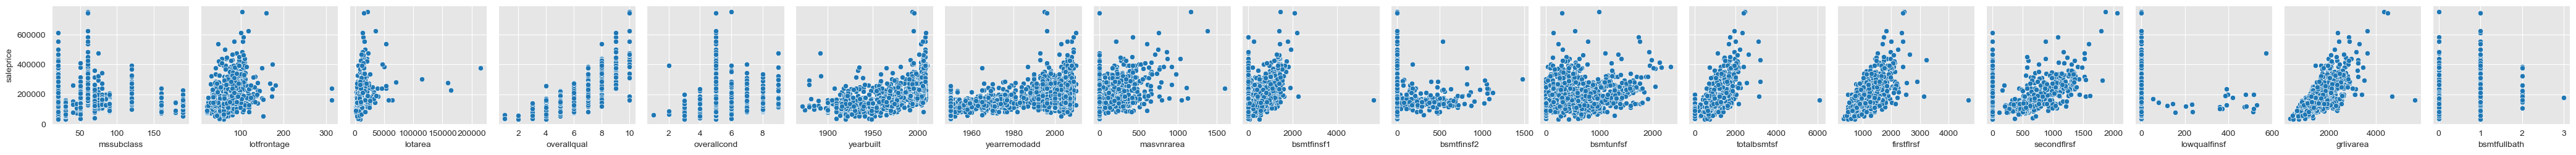

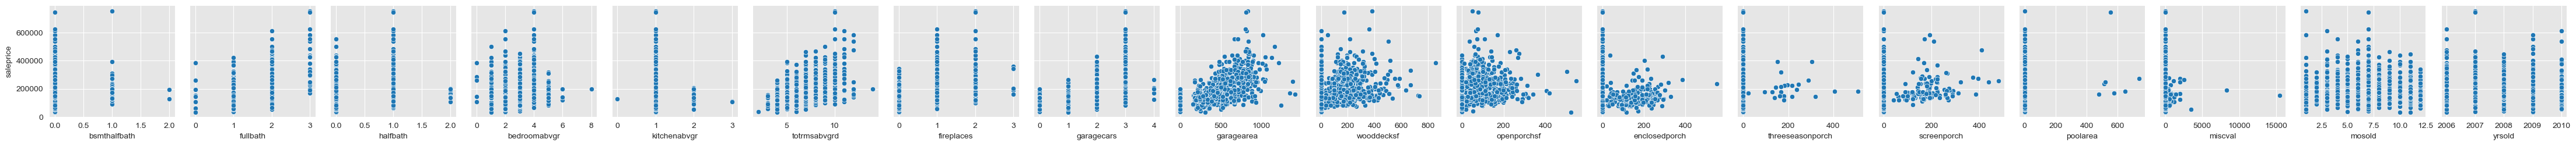

In [24]:
# Relationships between Price and each individual feature

half = len(input_cols_num)//2

fig1=sns.pairplot(
    df_train,
    x_vars=input_cols_num[:half],
    y_vars=output_col
)

fig2=sns.pairplot(
    df_train,
    x_vars=input_cols_num[half:],
    y_vars=output_col
)

1b Create the pairplots for the categorical values

In [19]:
input_cols_cat = ['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
               'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'roofstyle', 
               'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation', 
               'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'heating', 'heatingqc', 
               'centralair', 'electrical', 'kitchenqual', 'functional', 'fireplacequ', 'garagetype', 'garageyrblt', 
               'garagefinish', 'garagequal', 'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature', 
               'saletype', 'salecondition']
output_col = ['saleprice']

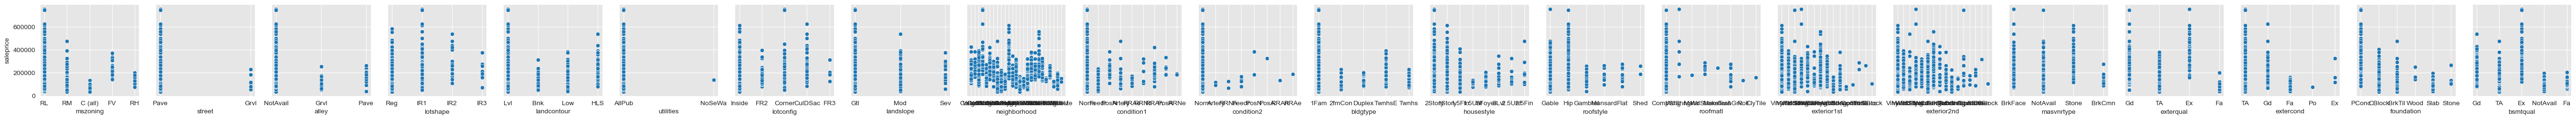

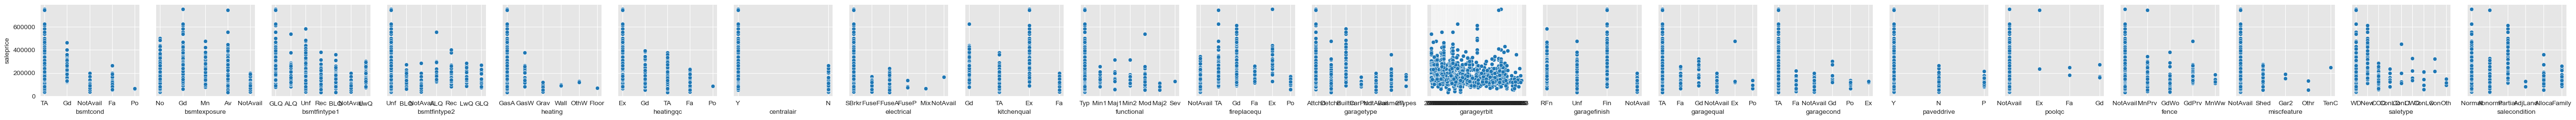

In [26]:
# Relationships between Price and each individual feature

half = len(input_cols_cat)//2

fig1=sns.pairplot(
    df_train,
    x_vars=input_cols_cat[:half],
    y_vars=output_col
)

fig2=sns.pairplot(
    df_train,
    x_vars=input_cols_cat[half:],
    y_vars=output_col
)

1c - Check the correlation of each numeric column with the sales price

In [20]:
# We can assume that the closer the correlation gets to 1 the stronger the relationship is between price and the particular column.

for col in df_train[input_cols_num].columns:
    corr = df_train[output_col].corrwith(df_train[col])
    print (col, corr.to_string(header=False, index=False)) # print the string without header and index

mssubclass -0.084284
lotfrontage 0.341542
lotarea 0.263843
overallqual 0.790982
overallcond -0.077856
yearbuilt 0.522897
yearremodadd 0.507101
masvnrarea 0.472614
bsmtfinsf1 0.38642
bsmtfinsf2 -0.011378
bsmtunfsf 0.214479
totalbsmtsf 0.613581
firstflrsf 0.605852
secondflrsf 0.319334
lowqualfinsf -0.025606
grlivarea 0.708624
bsmtfullbath 0.227122
bsmthalfbath -0.016844
fullbath 0.560664
halfbath 0.284108
bedroomabvgr 0.168213
kitchenabvgr -0.135907
totrmsabvgrd 0.533723
fireplaces 0.466929
garagecars 0.640409
garagearea 0.623431
wooddecksf 0.324413
openporchsf 0.315856
enclosedporch -0.128578
threeseasonporch 0.044584
screenporch 0.111447
poolarea 0.092404
miscval -0.02119
mosold 0.046432
yrsold -0.028923


1d - Correlation displayed in a heatmap

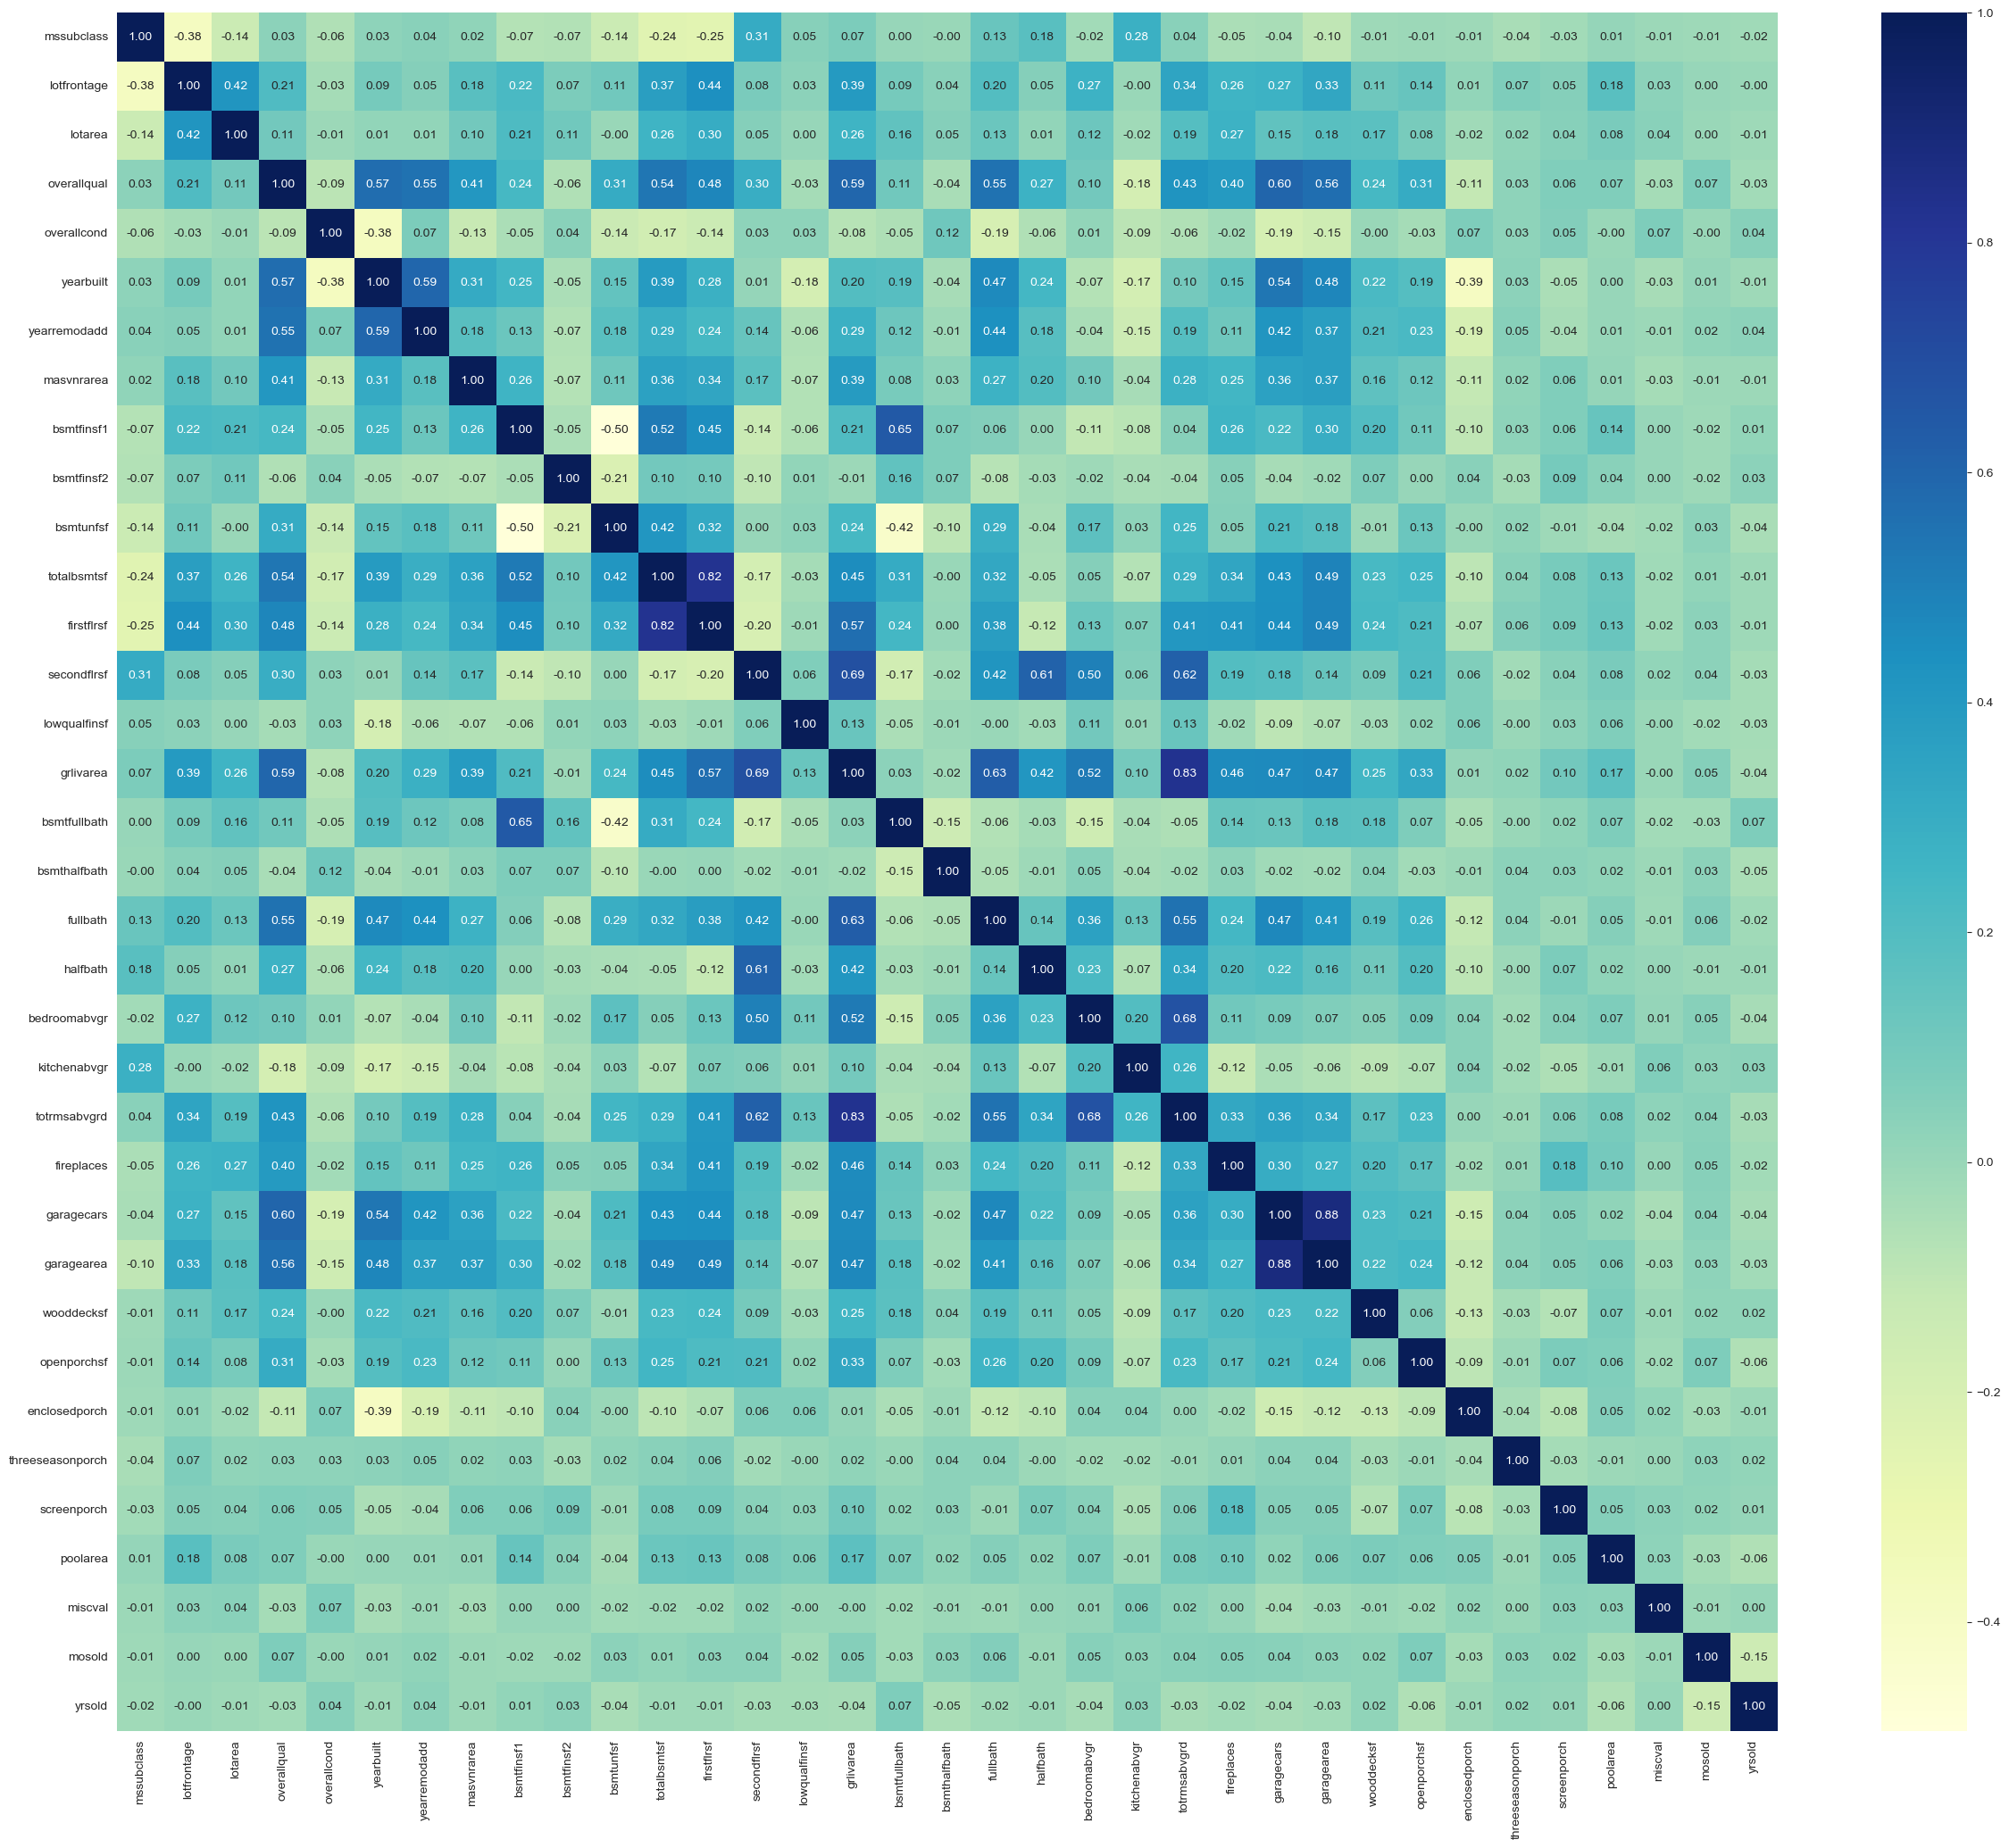

In [28]:
plt.figure(figsize=(30,25))
sns.heatmap(df_train[input_cols_num].corr(),cmap='YlGnBu',annot=True,fmt='.2f',xticklabels=True,yticklabels=True)
plt.show()

In [ ]:
In the QQ plot, clusters are visible in many features. Some features, such as GrLivArea, LotFrontage, TotalBsmtSF, etc., have a skewed normal distribution with numerous outliers.

for column in df_train[input_cols_num].columns:
    sm.qqplot(df_train[column], line='s')
    plt.title(f'QQ Plot for {column}')
    plt.show()

1e - Check for Outliers using Z_score (not applied)

In [ ]:
# Import pandas and scipy libraries
# from scipy import stats

# Calculate the Z-score for each value in the column
# z_scores = stats.zscore(df_train['utilities_encoded'])

# Create a boolean array that indicates the outlier rows
# outliers = (z_scores > 3) | (z_scores < -3)

# Print the outlier rows
# df_train[outliers].shape

2 - Remove Outliers from training data

In [21]:
def remove_outliers(df):
    df = df.query('salecondition != "Abnorml"')
    df = df.query('saleprice < 700000')
    df = df.query('lotarea < 100000')
    query_result = df.query('(overallcond == 2) & (saleprice > 200000)')
    df = df.drop(query_result.index)
    df = df.query('masvnrarea < 1300')
    df = df.query('bsmtfinsf1 < 3000')
    df = df.query('totalbsmtsf < 6000')
    df = df.query("firstflrsf < 4000")
    df = df.query("grlivarea < 4000")
    df = df.query("garagearea < 1200")
    return df

In [22]:
df_train = remove_outliers(df_train)

In [23]:
df_train.shape

(1345, 81)

### Save the files as Unencoded

In [24]:
# Save the dataframe to csv without the index
df_train.to_csv('data/train_unencoded.csv', index=False)
df_test.to_csv('data/test_unencoded.csv', index=False)

### LabelEncoding of categorical colums in df_train and df_test

1a - Concatenate train and test to df_both

In [23]:
# Determine the range values of the ID column in df_train and df_test
print(df_train.id.min(), df_train.id.max())
print(df_test.id.min(), df_test.id.max())

1 1460
1461 2919


In [24]:
df_both = pd.concat([df_train, df_test])

1b - Use LabelEncoding to encode the categorical columns

In [25]:
#import LabelEncoder

# cat_encoding_cols = ['mszoning', 'neighborhood', 'housestyle', 'masvnrtype', 'foundation']
cat_encoding_cols = ['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'roofstyle', 
'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation', 
'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'heating', 'heatingqc', 
'centralair', 'electrical', 'kitchenqual', 'functional', 'fireplacequ', 'garagetype', 'garageyrblt', 
'garagefinish', 'garagequal', 'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature', 
'saletype', 'salecondition','mssubclass', 'overallqual', 'overallcond', 'bsmtfullbath', 'bsmthalfbath', 
'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd', 'fireplaces', 'garagecars', 'mosold', 'yrsold']

from sklearn.preprocessing import LabelEncoder

#create an instance of LabelEncoder
le = LabelEncoder()

#use a loop to apply LabelEncoder to each column
for col in cat_encoding_cols:
    #fit and transform the column and assign it to a new column with _encoded suffix
    df_both[col+'_encoded'] = le.fit_transform(df_both[col])

1c - Drop obsolete columns and split the file back to df_train and df_test

In [26]:
# Drop the (original) categorical columns
df_both = df_both.drop(columns=cat_encoding_cols)
df_both = df_both.sort_values(by='id', ascending=True)

In [27]:
# Subset the rows where ID is from 1 to 1460 to df_train
df_train = df_both.query('id >= 1 and id <= 1460')

# Subset the rows where ID is from 1461 to 2919 to df_test
df_test = df_both.query('id >= 1461 and id <= 2919')
df_test = df_test.drop(columns='saleprice')

In [40]:
df_test.head()

,id,lotfrontage,lotarea,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,garagearea,wooddecksf,openporchsf,enclosedporch,threeseasonporch,screenporch,poolarea,miscval,mszoning_encoded,street_encoded,alley_encoded,lotshape_encoded,landcontour_encoded,utilities_encoded,lotconfig_encoded,landslope_encoded,neighborhood_encoded,condition1_encoded,condition2_encoded,bldgtype_encoded,housestyle_encoded,roofstyle_encoded,roofmatl_encoded,exterior1st_encoded,exterior2nd_encoded,masvnrtype_encoded,exterqual_encoded,extercond_encoded,foundation_encoded,bsmtqual_encoded,bsmtcond_encoded,bsmtexposure_encoded,bsmtfintype1_encoded,bsmtfintype2_encoded,heating_encoded,heatingqc_encoded,centralair_encoded,electrical_encoded,kitchenqual_encoded,functional_encoded,fireplacequ_encoded,garagetype_encoded,garageyrblt_encoded,garagefinish_encoded,garagequal_encoded,garagecond_encoded,paveddrive_encoded,poolqc_encoded,fence_encoded,miscfeature_encoded,saletype_encoded,salecondition_encoded,mssubclass_encoded,overallqual_encoded,overallcond_encoded,bsmtfullbath_encoded,bsmthalfbath_encoded,fullbath_encoded,halfbath_encoded,bedroomabvgr_encoded,kitchenabvgr_encoded,totrmsabvgrd_encoded,fireplaces_encoded,garagecars_encoded,mosold_encoded,yrsold_encoded
0,1461,80,11622,1961,1961,0,468,144,270,882,896,0,0,896,730,140,0,0,0,120,0,0,3,1,1,3,3,0,4,0,12,1,2,0,2,1,0,12,14,2,3,4,1,4,4,3,5,3,1,4,1,4,4,7,3,1,52,3,5,5,2,3,2,1,9,4,0,4,5,0,0,1,0,2,1,3,0,1,5,4
1,1462,81,14267,1958,1958,108,923,0,406,1329,1329,0,0,1329,312,393,36,0,0,0,0,12500,4,1,1,0,3,0,0,0,12,2,2,0,2,3,0,13,15,1,3,4,1,4,4,3,0,6,1,4,1,4,2,7,3,1,49,3,5,5,2,3,4,0,9,4,0,5,5,0,0,1,1,3,1,4,0,1,5,4
2,1463,74,13830,1997,1998,0,791,0,137,928,928,701,0,1629,482,212,34,0,0,0,0,0,4,1,1,0,3,0,4,0,8,2,2,0,5,1,0,12,14,2,3,4,2,2,4,3,2,6,1,2,1,4,4,7,5,1,88,0,5,5,2,3,2,1,9,4,5,4,4,0,0,2,1,3,1,4,1,2,2,4
3,1464,78,9978,1998,1998,20,602,0,324,926,926,678,0,1604,470,360,36,0,0,0,0,0,4,1,1,0,3,0,4,0,8,2,2,0,5,1,0,12,14,1,3,4,2,4,4,3,2,6,1,0,1,4,2,7,2,1,89,0,5,5,2,3,4,1,9,4,5,5,5,0,0,2,1,3,1,5,1,2,5,4
4,1465,43,5005,1992,1992,0,263,0,1017,1280,1280,0,0,1280,506,0,82,0,0,144,0,0,4,1,1,0,1,0,4,0,22,2,2,4,2,1,0,6,6,2,2,4,2,2,4,3,0,6,1,0,1,4,2,7,3,1,83,2,5,5,2,3,4,1,9,4,11,7,4,0,0,2,0,2,1,3,0,2,0,4


### Saving ML input file

In [41]:
df_train.to_csv('data/df_train_label_enc.csv', index=False)
df_test.to_csv('data/df_test_label_enc.csv', index=False)

### Create a Machine Learning Model

In [ ]:
df_train = pd.read_csv('data/df_train_label_enc.csv', keep_default_na=False)
df_test = pd.read_csv('data/df_test_label_enc.csv', keep_default_na=False)

1a - Simple Linear Regression Model

In [42]:
df_train.columns

Index(['id', 'lotfrontage', 'lotarea', 'yearbuilt', 'yearremodadd',
       'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf',
       'firstflrsf', 'secondflrsf', 'lowqualfinsf', 'grlivarea', 'garagearea',
       'wooddecksf', 'openporchsf', 'enclosedporch', 'threeseasonporch',
       'screenporch', 'poolarea', 'miscval', 'saleprice', 'mszoning_encoded',
       'street_encoded', 'alley_encoded', 'lotshape_encoded',
       'landcontour_encoded', 'utilities_encoded', 'lotconfig_encoded',
       'landslope_encoded', 'neighborhood_encoded', 'condition1_encoded',
       'condition2_encoded', 'bldgtype_encoded', 'housestyle_encoded',
       'roofstyle_encoded', 'roofmatl_encoded', 'exterior1st_encoded',
       'exterior2nd_encoded', 'masvnrtype_encoded', 'exterqual_encoded',
       'extercond_encoded', 'foundation_encoded', 'bsmtqual_encoded',
       'bsmtcond_encoded', 'bsmtexposure_encoded', 'bsmtfintype1_encoded',
       'bsmtfintype2_encoded', 'heating_encoded', 'heatin

In [28]:
# Separate features and target

# submission.csv: features = ['lotfrontage','overallqual','yearbuilt','yearremodadd','masvnrarea','bsmtfinsf1','totalbsmtsf','firstflrsf','secondflrsf','grlivarea','totrmsabvgrd','garagecars','garagearea','wooddecksf','mszoning_encoded','neighborhood_encoded', 'housestyle_encoded', 'masvnrtype_encoded','foundation_encoded']
# submission2.csv: features = ['lotfrontage', 'lotarea', 'yearbuilt', 'yearremodadd','masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf','firstflrsf', 'secondflrsf', 'lowqualfinsf', 'grlivarea', 'garagearea','wooddecksf', 'openporchsf', 'enclosedporch', 'threeseasonporch','screenporch', 'poolarea', 'miscval', 'mszoning_encoded','street_encoded', 'alley_encoded', 'lotshape_encoded','landcontour_encoded', 'utilities_encoded', 'lotconfig_encoded','landslope_encoded', 'neighborhood_encoded', 'condition1_encoded','condition2_encoded', 'bldgtype_encoded', 'housestyle_encoded','roofstyle_encoded', 'roofmatl_encoded', 'exterior1st_encoded','exterior2nd_encoded', 'masvnrtype_encoded', 'exterqual_encoded','extercond_encoded', 'foundation_encoded', 'bsmtqual_encoded','bsmtcond_encoded', 'bsmtexposure_encoded', 'bsmtfintype1_encoded','bsmtfintype2_encoded', 'heating_encoded', 'heatingqc_encoded','centralair_encoded', 'electrical_encoded', 'kitchenqual_encoded','functional_encoded', 'fireplacequ_encoded', 'garagetype_encoded','garageyrblt_encoded', 'garagefinish_encoded', 'garagequal_encoded','garagecond_encoded', 'paveddrive_encoded', 'poolqc_encoded','fence_encoded', 'miscfeature_encoded', 'saletype_encoded','salecondition_encoded', 'mssubclass_encoded', 'overallqual_encoded','overallcond_encoded', 'bsmtfullbath_encoded', 'bsmthalfbath_encoded','fullbath_encoded', 'halfbath_encoded', 'bedroomabvgr_encoded','kitchenabvgr_encoded', 'totrmsabvgrd_encoded', 'fireplaces_encoded','garagecars_encoded', 'mosold_encoded', 'yrsold_encoded']
# submission3.csv: features = ['grlivarea','overallqual_encoded','exterqual_encoded','lotarea','yearbuilt','totalbsmtsf','bsmtfinsf1','firstflrsf','totrmsabvgrd_encoded','masvnrarea','functional_encoded','poolarea','secondflrsf','bsmtqual_encoded','masvnrtype_encoded','kitchenqual_encoded','kitchenabvgr_encoded','bldgtype_encoded','overallcond_encoded','poolqc_encoded','bedroomabvgr_encoded','exterior1st_encoded','screenporch','salecondition_encoded','garagearea','garagecars_encoded','garagetype_encoded','street_encoded','foundation_encoded','lotfrontage','openporchsf','garagecond_encoded','paveddrive_encoded','wooddecksf','bsmtexposure_encoded','fireplacequ_encoded','landcontour_encoded','bsmtunfsf','exterior2nd_encoded','fireplaces_encoded','roofmatl_encoded','roofstyle_encoded','yearremodadd','mosold_encoded','saletype_encoded']

features = ['grlivarea','overallqual_encoded','exterqual_encoded','lotarea','yearbuilt','totalbsmtsf','bsmtfinsf1','firstflrsf','totrmsabvgrd_encoded','masvnrarea','functional_encoded','poolarea','secondflrsf','bsmtqual_encoded','masvnrtype_encoded','kitchenqual_encoded','kitchenabvgr_encoded','bldgtype_encoded','overallcond_encoded','poolqc_encoded','bedroomabvgr_encoded','exterior1st_encoded','screenporch','salecondition_encoded','garagearea','garagecars_encoded','garagetype_encoded','street_encoded','foundation_encoded','lotfrontage','openporchsf','garagecond_encoded','paveddrive_encoded','wooddecksf','bsmtexposure_encoded','fireplacequ_encoded','landcontour_encoded','bsmtunfsf','exterior2nd_encoded','fireplaces_encoded','roofmatl_encoded','roofstyle_encoded','yearremodadd','mosold_encoded','saletype_encoded']
target = ['saleprice']

X = df_train[features]
y = df_train[target]

In [29]:
# Score with all columns categorized correctly (submissions2.csv)
# Validation score: 0.9214
# Validation RMSE: 24280.0009
# Test score: 0.8873
# Test RMSE: 24028.2352

# Score columns categorized correctly, but with less columns (submissions3.csv)
# Validation score: 0.9244
# Validation RMSE: 23816.8230
# Test score: 0.8915
# Test RMSE: 23576.6045


# Split data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the validation set
val_score = model.score(X_val, y_val)
val_rmse = mean_squared_error(y_val, model.predict(X_val), squared=False)
print(f"Validation score: {val_score:.4f}")
print(f"Validation RMSE: {val_rmse:.4f}")

# Test the model on the test set
test_score = model.score(X_test, y_test)
test_rmse = mean_squared_error(y_test, model.predict(X_test), squared=False)
print(f"Test score: {test_score:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Validation score: 0.9244
Validation RMSE: 23816.8230
Test score: 0.8915
Test RMSE: 23576.6045


1b - Check the most relevant features

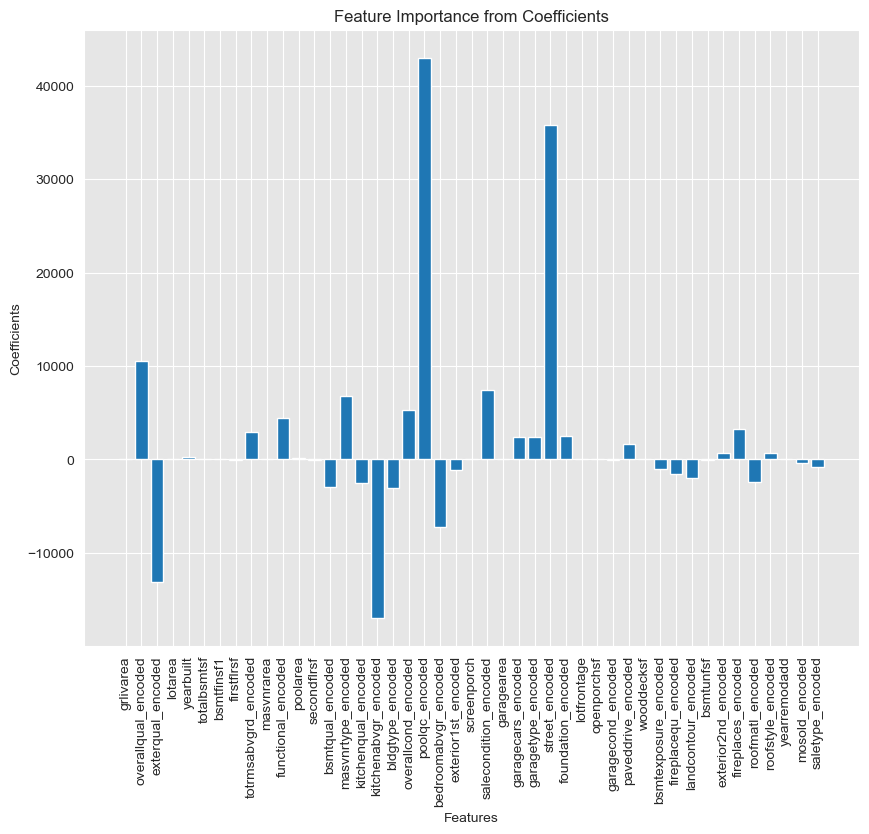

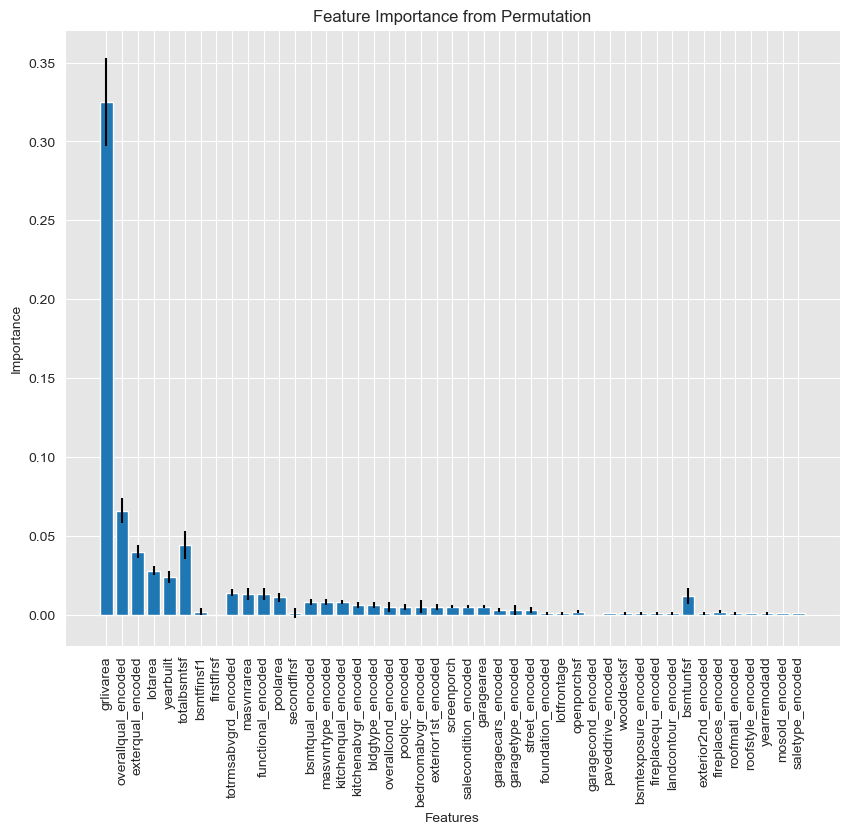

In [30]:
# Get the feature names
input = X.columns

# Flatten the coefficients array to a one-dimensional array
coefficients = np.ravel(model.coef_)

# Plot the coefficients as feature importance
plt.figure(figsize=(10, 8))
plt.bar(input, coefficients)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Coefficients")
plt.title("Feature Importance from Coefficients")
plt.show()

# Calculate the permutation feature importance scores
result = permutation_importance(model, X_val, y_val, n_repeats=10, random_state=42)

# Get the mean and standard deviation of the scores
importance = result.importances_mean
std = result.importances_std

importance = np.round(importance, decimals=3)
std = np.round(std, decimals=3)

# Plot the permutation feature importance scores
plt.figure(figsize=(10, 8))
plt.bar(input, importance, yerr=std)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance from Permutation")
plt.show()

1c - Check feature importance

In [31]:
# Create a dataframe from the feature names and the coefficients
coef_df = pd.DataFrame({"Feature": input, "Coefficient": coefficients})
print(coef_df.sort_values(by='Coefficient', ascending=True))

# Create a dataframe from the feature names and the scores
perm_df = pd.DataFrame({"Feature": input, "Importance": importance, "Std": std})
print(perm_df.sort_values(by='Importance', ascending=False))

                  Feature   Coefficient
16   kitchenabvgr_encoded -16950.403074
2       exterqual_encoded -13146.143981
20   bedroomabvgr_encoded  -7174.288808
17       bldgtype_encoded  -3010.514572
13       bsmtqual_encoded  -2993.889522
15    kitchenqual_encoded  -2516.596153
40       roofmatl_encoded  -2450.958097
36    landcontour_encoded  -1939.037578
35    fireplacequ_encoded  -1592.048949
21    exterior1st_encoded  -1146.269057
34   bsmtexposure_encoded  -1018.850340
44       saletype_encoded   -812.172250
43         mosold_encoded   -388.396571
31     garagecond_encoded    -64.407884
37              bsmtunfsf    -17.287525
12            secondflrsf    -13.483816
7              firstflrsf     -0.327865
3                 lotarea      1.154799
6              bsmtfinsf1      5.138384
33             wooddecksf      7.232548
24             garagearea     10.542924
30            openporchsf     20.291812
5             totalbsmtsf     29.722237
9              masvnrarea     34.510837


2 - Plot linear regression (expected values) vs. the predicted values

In [32]:
%matplotlib inline
# Import plotting package
import plotly.express as px

# Get the expected values from the target array
expected = y
expected = np.ravel(expected)

# Get the predicted values from the model
predicted = model.predict(X)
predicted = np.ravel(predicted)

# Put data to plot in dataframe
df_plot = pd.DataFrame({'expected':expected, 'predicted':predicted})

# Make scatter plot from data
fig = px.scatter(
    df_plot, 
    x='expected', 
    y='predicted',
    title='Predicted vs. Actual Values')

fig.show()

2b - Print the RMSE and R2 score

In [33]:
# Score with all columns correctly categorized
# RMS: 23298.8699 
# R2: 0.9052

# Score with less columns (submission3)
RMS: 23284.3284 
R2: 0.9053

# Print the root mean square error (RMS)
error = np.sqrt(np.mean((np.array(predicted) - np.array(expected)) ** 2))
print(f"RMS: {error:.4f} ")

r2=r2_score(expected, predicted)
print(f"R2: {round(r2,4)}") 

RMS: 23284.3284 
R2: 0.9053


### Predict the values in df_test for the Kaggle competition

In [34]:
# https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

# Submission.csv: first attempt
# Submission2.csv: better attempt with all columns included and correctly categorized
# Submission3.csv: better attempt with less columns
# Submission4.csv: LightGBM model

# Extract the features from df_test
X_test = df_test.loc[:, features]

# Get the predicted values for the saleprice
y_pred = model.predict(X_test)

# Flatten the saleprice array to a one-dimensional array
saleprice = np.ravel(y_pred)

# Create the dataframe from the id array and the flattened array
predictions = pd.DataFrame({'id': df_test['id'], 'saleprice': saleprice})

# Save the predictions dataframe to a CSV file
predictions.to_csv('submission3.csv', index=False)

### Create a LightGBM model with unencoded data (best Kaggle score - submission4.csv)

In [40]:
# Load data from the csv file

df_train = pd.read_csv('data/train_unencoded.csv', keep_default_na=False)
df_test = pd.read_csv('data/test_unencoded.csv', keep_default_na=False)

In [41]:
# Assuming you have a dataframe called df
# Create a list of the fields you want to convert
fields = ['exterqual', 'functional', 'bsmtqual', 'masvnrtype', 'kitchenqual', 'bldgtype', 'poolqc', 'exterior1st', 'salecondition', 'garagetype', 'street', 'foundation', 'garagecond', 'paveddrive', 'bsmtexposure', 'fireplacequ', 'landcontour', 'exterior2nd', 'roofmatl', 'roofstyle', 'saletype']

# Loop through the list and convert each field to category dtype
for field in fields:
    df_test[field] = df_test[field].astype('category')

In [36]:
df_train.columns

Index(['id', 'lotfrontage', 'lotarea', 'yearbuilt', 'yearremodadd',
       'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf',
       'firstflrsf', 'secondflrsf', 'lowqualfinsf', 'grlivarea', 'garagearea',
       'wooddecksf', 'openporchsf', 'enclosedporch', 'threeseasonporch',
       'screenporch', 'poolarea', 'miscval', 'saleprice', 'mszoning_encoded',
       'street_encoded', 'alley_encoded', 'lotshape_encoded',
       'landcontour_encoded', 'utilities_encoded', 'lotconfig_encoded',
       'landslope_encoded', 'neighborhood_encoded', 'condition1_encoded',
       'condition2_encoded', 'bldgtype_encoded', 'housestyle_encoded',
       'roofstyle_encoded', 'roofmatl_encoded', 'exterior1st_encoded',
       'exterior2nd_encoded', 'masvnrtype_encoded', 'exterqual_encoded',
       'extercond_encoded', 'foundation_encoded', 'bsmtqual_encoded',
       'bsmtcond_encoded', 'bsmtexposure_encoded', 'bsmtfintype1_encoded',
       'bsmtfintype2_encoded', 'heating_encoded', 'heatin

In [42]:
# Assuming you have a dataframe called df
# Create a list of the fields you want to convert
fields = ['exterqual', 'functional', 'bsmtqual', 'masvnrtype', 'kitchenqual', 'bldgtype', 'poolqc', 'exterior1st', 'salecondition', 'garagetype', 'street', 'foundation', 'garagecond', 'paveddrive', 'bsmtexposure', 'fireplacequ', 'landcontour', 'exterior2nd', 'roofmatl', 'roofstyle', 'saletype']

# Loop through the list and convert each field to category dtype
for field in fields:
    df_train[field] = df_train[field].astype('category')


In [43]:
features = ['grlivarea','overallqual','exterqual','lotarea','yearbuilt','totalbsmtsf','bsmtfinsf1','firstflrsf','totrmsabvgrd','masvnrarea','functional','poolarea','secondflrsf','bsmtqual','masvnrtype','kitchenqual','kitchenabvgr','bldgtype','overallcond','poolqc','bedroomabvgr','exterior1st','screenporch','salecondition','garagearea','garagecars','garagetype','street','foundation','lotfrontage','openporchsf','garagecond','paveddrive','wooddecksf','bsmtexposure','fireplacequ','landcontour','bsmtunfsf','exterior2nd','fireplaces','roofmatl','roofstyle','yearremodadd','mosold','saletype']
target = ['saleprice']

X = df_train[features]
y = df_train[target]

In [44]:
# Best score:
# Validation score: 0.9087
# Validation RMSE: 26165.8197
# Test score: 0.9014
# Test RMSE: 22478.9209

# Import the necessary modules
import lightgbm as lgb

# Split data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

# Best parameters LightGBM
gbm_best_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 6,
    'num_iterations':800,
    'n_estimators': 200, 
    'learning_rate':0.02,
    'deterministic':True,
    'verbose': -1,  
}

# Create and train a linear regression model
model = lgb.LGBMRegressor(**gbm_best_params) # Use the best parameters

model.fit(X_train, y_train)

# Evaluate the model on the validation set
val_score = model.score(X_val, y_val)
val_rmse = mean_squared_error(y_val, model.predict(X_val), squared=False)
print(f"Validation score: {val_score:.4f}")
print(f"Validation RMSE: {val_rmse:.4f}")

# Test the model on the test set
test_score = model.score(X_test, y_test)
test_rmse = mean_squared_error(y_test, model.predict(X_test), squared=False)
print(f"Test score: {test_score:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Validation score: 0.9087
Validation RMSE: 26165.8197
Test score: 0.9014
Test RMSE: 22478.9209


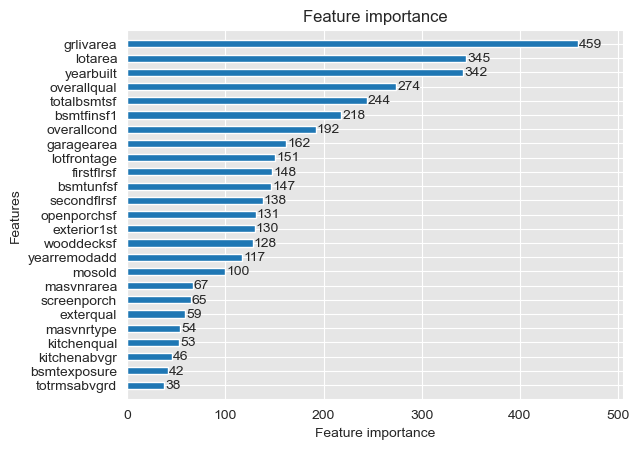

In [45]:
lightgbm.plot_importance(model,height=0.5,precision=100,max_num_features=25);

### Predict the LightGBM values in df_test for the Kaggle competition

In [46]:
# https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

# Submission.csv: first attempt
# Submission2.csv: better attempt with all columns included and correctly categorized
# Submission3.csv: better attempt with less columns
# Submission4.csv: LightGBM model

# Extract the features from df_test
X_test = df_test.loc[:, features]

# Get the predicted values for the saleprice
y_pred = model.predict(X_test)

# Flatten the saleprice array to a one-dimensional array
saleprice = np.ravel(y_pred)

# Create the dataframe from the id array and the flattened array
predictions = pd.DataFrame({'id': df_test['id'], 'saleprice': saleprice})

# Save the predictions dataframe to a CSV file
predictions.to_csv('submission4.csv', index=False)